In [32]:
#!/usr/local/bin/python3.7

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy_indexed as npi
import os, netCDF4, time
from matplotlib.colors import Normalize

os.chdir('/Users/hausfath/Desktop/Climate Science/GHCN Monthly/')

berkeley_file = 'Complete_TAVG_LatLong1.nc'

In [207]:
def import_berkeley(filename, verbose = False):
    nc = netCDF4.Dataset(filename, 'r')
    lats = nc.variables['latitude'][:]
    lons = nc.variables['longitude'][:]
    temps = nc.variables['temperature'][:,:,:]
    times = nc.variables['time'][:]
    years = times.astype(int)
    return {
        'lats' : lats,
        'lons' : lons,
        'temps' : temps,
        'times' : times,
        'years' : years
    }


def local_timeseries(data, local_lat, local_lon):
    near_lat = find_nearest(data['lats'], local_lat)
    near_lon = find_nearest(data['lons'], local_lon)
    near_lat_pos = np.where(data['lats'] == near_lat)[0][0]
    near_lon_pos = np.where(data['lons'] == near_lon)[0][0]
    try:
        anoms = np.swapaxes(data['anoms'],0,2)
        anoms = np.swapaxes(anoms,0,1)
    except:
        anoms = np.swapaxes(data['temps'],0,2)
        anoms = np.swapaxes(anoms,0,1)
    return anoms[near_lat_pos][near_lon_pos]


def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]


def berkeley_local_annual(filename, local_lat, local_lon, data):
    local_data = local_timeseries(data, local_lat, local_lon)
    unique, mean = npi.group_by(data['years']).mean(local_data)
    df = pd.DataFrame({'years' : unique,
                       'temps' : mean})
    return df

#results = berkeley_local_annual(berkeley_file, doha_lat, doha_lon)

data = import_berkeley(berkeley_file)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  """


138 189


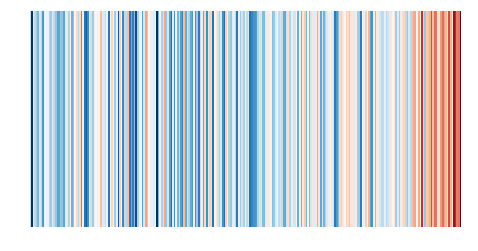

In [206]:
#Name of CSV file containing the data (one column only)

savename = 'Stuttgart'

lat = 48.7758
lon = 9.1829

results = berkeley_local_annual(berkeley_file, lat, lon, data)

year_loc = np.where((results['years'] >= 1750) & (results['years'] <= 2018))[0]
temps = results['temps'][year_loc] 
#np.genfromtxt(temp_data, delimiter=",")[1:]
temps_normed = ((temps - temps.min(0)) / temps.ptp(0)) * (len(temps) - 1)
elements = len(temps)

x_lbls = np.arange(elements)
y_vals = temps_normed / (len(temps) - 1)
y_vals2 = np.full(elements, 1)
bar_wd  = 1

my_cmap = plt.cm.RdBu_r #choose colormap to use for bars
norm = Normalize(vmin=0, vmax=elements - 1)

def colorval(num):
    return my_cmap(norm(num))

fig=plt.figure(figsize=(6,3))
plt.axis('off')
plt.axis('tight')

#Plot warming stripes. Change y_vals2 to y_vals to plot stripes under the line only.
plt.bar(x_lbls, y_vals2, color = list(map(colorval, temps_normed)), width=1.0, edgecolor = "none")

#Plot temperature timeseries. Comment out to only plot stripes
#plt.plot((x_lbls + 0.5), y_vals - 0.002, color='black', linewidth=2)

plt.xticks( x_lbls + bar_wd, x_lbls)
plt.ylim(0, 1)
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
fig.savefig(savename+'.png', dpi=300)
